# Steps for image classification on CIFAR-10:
#1. Load the dataset from keras datasets module:

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test)=cifar10.load_data()

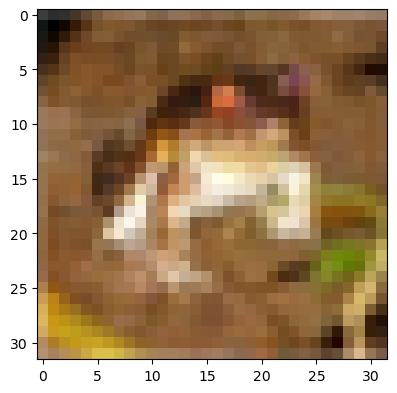

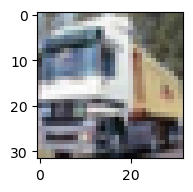

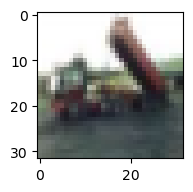

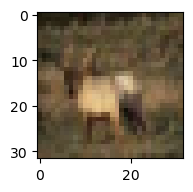

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
for i in range(4):
  plt.subplot(2,3,i+1)
  plt.imshow(X_train[i])
  plt.show()

2. Plot some images from the dataset to visualize the dataset

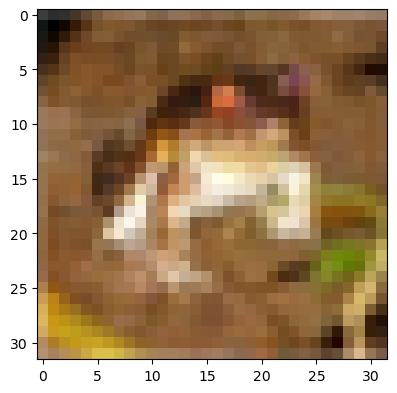

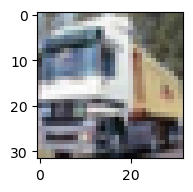

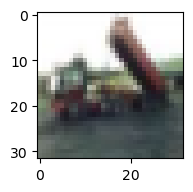

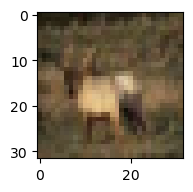

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
for i in range(4):
  plt.subplot(2,3,i+1)
  plt.imshow(X_train[i])
  plt.show()

3.Import the required layers and modules to create our convolution neural net architecture:

In [53]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import gradient_descent_v2
#from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

4.Convert the pixel values of the dataset to float type and then normalize the datase:

In [38]:
X_train.shape

(50000, 32, 32, 3)

In [39]:
X_train= X_train.astype('float32')/255.0
X_test= X_test.astype('float32')/255.0

X_train=X_train.reshape(-1, 32,32,3)
X_test=X_test.reshape(-1, 32,32,3)
X_train.shape


(50000, 32, 32, 3)

5.Now perform the one-hot encoding for target classes

In [41]:
y_test.shape

(10000, 1)

In [43]:
from tensorflow.keras.utils import to_categorical
y_train_cat= to_categorical(y_train)
y_test_cat= to_categorical(y_test)

y_test_cat.shape

(10000, 10)

In [44]:
num_classes=y_test_cat.shape[1]

In [45]:
y_test.shape

(10000, 1)

In [46]:
num_classes

10

6.Create the sequential model and add the layers

In [47]:
model= Sequential()
model.add( Conv2D(32, (3,3), padding='same', strides=(2,1), activation='relu',kernel_constraint=maxnorm(3), input_shape=(32,32,3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 16, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 16, 32)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               2097664   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

7.Configure the optimizer and compile the model

In [54]:
sgd=gradient_descent_v2.SGD(learning_rate=0.01,momentum=0.9,decay=(0.01/25))
 
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

8.View the model summary for better understanding of model architectur

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 16, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 16, 32)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               2097664   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [ ]:
model.fit(X_train,y_train_cat,  validation_data=(X_test,y_test_cat),epochs=10,batch_size=32,)

10.Calculate its accuracy on testing data

In [58]:
_,acc=model.evaluate(X_test,y_test_cat)
print(acc*100)

313/313 [==============================] - 2s 8ms/step - loss: 1.0609 - accuracy: 0.6368
63.679999113082886


11.Save the model:

In [ ]:
model.save("model1_cifar_10epoch.h5")

In [60]:
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}
from PIL import Image
import numpy as np
im=Image.open('__Image Path___')
# the input image is required to be in the shape of dataset, i.e (32,32,3)
 
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
print(pred,results[pred])

FileNotFoundError: [Errno 2] No such file or directory: '__Image Path___'